In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as offline

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

## 1.Load Data

In [3]:
raw_data = pd.read_csv('train.csv' ,encoding = 'utf-8')

e:\simpletest\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
print(raw_data.head(5))
print(raw_data.shape)

   Id County Province_State Country_Region  Population    Weight        Date  \
0   1    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-23   
1   2    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-23   
2   3    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-24   
3   4    NaN            NaN    Afghanistan    27657145  0.583587  2020-01-24   
4   5    NaN            NaN    Afghanistan    27657145  0.058359  2020-01-25   

           Target  TargetValue  
0  ConfirmedCases            0  
1      Fatalities            0  
2  ConfirmedCases            0  
3      Fatalities            0  
4  ConfirmedCases            0  
(969640, 9)


### 1.1 Transfer 'Date' column to datatime format

In [5]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

print(raw_data.head(5))
print(raw_data.shape)

   Id County Province_State Country_Region  Population    Weight       Date  \
0   1    NaN            NaN    Afghanistan    27657145  0.058359 2020-01-23   
1   2    NaN            NaN    Afghanistan    27657145  0.583587 2020-01-23   
2   3    NaN            NaN    Afghanistan    27657145  0.058359 2020-01-24   
3   4    NaN            NaN    Afghanistan    27657145  0.583587 2020-01-24   
4   5    NaN            NaN    Afghanistan    27657145  0.058359 2020-01-25   

           Target  TargetValue  
0  ConfirmedCases            0  
1      Fatalities            0  
2  ConfirmedCases            0  
3      Fatalities            0  
4  ConfirmedCases            0  
(969640, 9)


### 1.2 Extracting data from start to 17/May

In [6]:
all_data = raw_data[raw_data['Date'] <= pd.datetime(2020,5,17)]
all_data.head(10)

e:\simpletest\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0
1,2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0
2,3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0
3,4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0
4,5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0
5,6,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-25,Fatalities,0
6,7,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-26,ConfirmedCases,0
7,8,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-26,Fatalities,0
8,9,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-27,ConfirmedCases,0
9,10,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-27,Fatalities,0


# 2. Data Exploration

[Text(0.5, 0, 'TargetValue'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'number of TargetValue')]

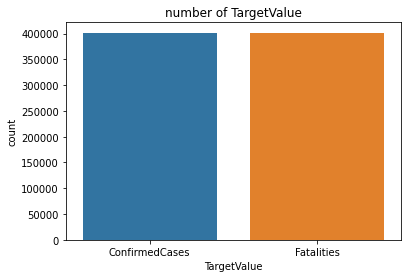

In [7]:
fig,ax = plt.subplots()
sns.barplot(x= all_data.Target.unique(),y= all_data.Target.value_counts())
ax.set(xlabel='TargetValue', ylabel='count',title="number of TargetValue")

In [8]:
all_data.sort_values(by=['TargetValue'], ascending= True).head(5)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
63464,63465,NaN,NaN,Spain,46438422,0.056646,2020-04-24,ConfirmedCases,-10034
35754,35755,NaN,NaN,France,66710000,0.055507,2020-04-29,ConfirmedCases,-2512
35740,35741,NaN,NaN,France,66710000,0.055507,2020-04-22,ConfirmedCases,-2206
30170,30171,NaN,NaN,Ecuador,16545799,0.060163,2020-05-07,ConfirmedCases,-1583
30172,30173,NaN,NaN,Ecuador,16545799,0.060163,2020-05-08,ConfirmedCases,-1480


I noticed that negative values in the target value column, Is it the change in quantity in the last few days?
trying to find Data around negatives

In [9]:
all_data[(all_data['Id'] > 63460) & (all_data['Id'] < 63470)]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
63460,63461,NaN,NaN,Spain,46438422,0.056646,2020-04-22,ConfirmedCases,4211
63461,63462,NaN,NaN,Spain,46438422,0.566455,2020-04-22,Fatalities,435
63462,63463,NaN,NaN,Spain,46438422,0.056646,2020-04-23,ConfirmedCases,4635
63463,63464,NaN,NaN,Spain,46438422,0.566455,2020-04-23,Fatalities,440
63464,63465,NaN,NaN,Spain,46438422,0.056646,2020-04-24,ConfirmedCases,-10034
63465,63466,NaN,NaN,Spain,46438422,0.566455,2020-04-24,Fatalities,367
63466,63467,NaN,NaN,Spain,46438422,0.056646,2020-04-25,ConfirmedCases,2915
63467,63468,NaN,NaN,Spain,46438422,0.566455,2020-04-25,Fatalities,378
63468,63469,NaN,NaN,Spain,46438422,0.056646,2020-04-26,ConfirmedCases,1729


Still no ideas about the meaning of negatives. maybe I should tread negatives as outliers and replaced as zeros.

In [10]:
# pie plot of country region
# fig = px.pie(all_data, values='TargetValue', names='Country_Region')
# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
# offline.iplot(fig)

In [11]:
last_date = all_data.Date.max()
df_countries = all_data[all_data['Date']==last_date]
df_countries = df_countries.groupby('Country_Region', as_index=False)['TargetValue'].sum()
df_countries = df_countries.nlargest(10,'TargetValue')
df_trend = all_data.groupby(['Date','Country_Region'], as_index=False)['TargetValue'].sum()
df_trend = df_trend.merge(df_countries, on='Country_Region')
df_trend.rename(columns={'Country_Region':'Country', 'TargetValue_x':'Cases'}, inplace=True)

In [15]:
offline.init_notebook_mode(connected=True)
a = px.line(df_trend, x='Date', y='Cases', color='Country', title='COVID19 Total Cases growth for top 10 worst affected countries')
offline.iplot(a)


